In [1]:
import cartopy
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point

In [2]:
file_in = 'precip.mon.mean.enh.nc'

In [3]:
with xr.open_dataset(file_in) as dset:
    print(dset)

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 511)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-07-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2108
    history:        update08/2021 V2108
    data_modified:  2021-08-06


In [4]:
# plot function

def plot_map(data_array):

    fig = plt.figure(figsize=(10, 10))

    ax = plt.axes(projection=cartopy.crs.PlateCarree())

    plt.contourf(
        data_array.lon,
        data_array.lat,
        data_array,
        20,
        transform=cartopy.crs.PlateCarree(),
        cmap=plt.cm.RdYlBu_r
    )

    gl = ax.gridlines(
        crs=cartopy.crs.PlateCarree(),
        draw_labels=True,
        linewidth=0.01
    )

    gl.top_labels = False
    gl.right_labels = False

    # contorno dos estados
    states = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        scale='50m', facecolor='none',
        name='admin_1_states_provinces_shp'
    )
    ax.add_feature(states, edgecolor='k')

    # contorno dos países
    countries = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        scale='50m', facecolor='none',
        name='admin_0_countries'
    )
    ax.add_feature(countries, edgecolor='k')

    plt.colorbar(shrink=0.9, orientation='horizontal')

    plt.show()

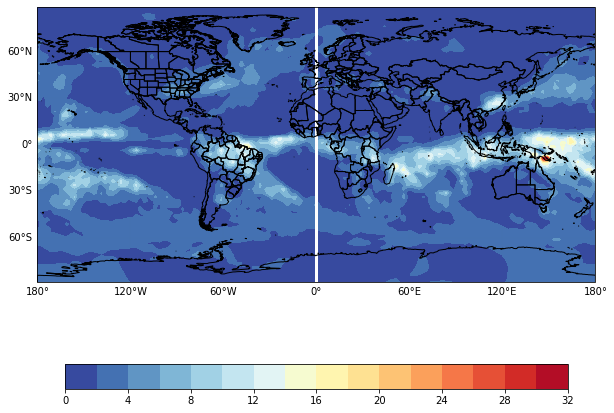

In [5]:
plot_map(dset['precip'].sel(time='2020-03-01'))

In [6]:
dset['precip'].shape  # longitudes antes do add_cyclic_point

(511, 72, 144)

In [7]:
# add_cyclic_point

lon = dset.coords['lon']

lon_idx = dset['precip'].dims.index('lon')

arr_data, arr_lon = add_cyclic_point(
    dset['precip'].values, coord=lon, axis=lon_idx
)

In [8]:
arr_data.shape  # mais 1 ponto de grade na longitude!

(511, 72, 145)

In [9]:
arr_lon

masked_array(data=[  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,
                    18.75,  21.25,  23.75,  26.25,  28.75,  31.25,  33.75,
                    36.25,  38.75,  41.25,  43.75,  46.25,  48.75,  51.25,
                    53.75,  56.25,  58.75,  61.25,  63.75,  66.25,  68.75,
                    71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,
                    88.75,  91.25,  93.75,  96.25,  98.75, 101.25, 103.75,
                   106.25, 108.75, 111.25, 113.75, 116.25, 118.75, 121.25,
                   123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
                   141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
                   158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75,
                   176.25, 178.75, 181.25, 183.75, 186.25, 188.75, 191.25,
                   193.75, 196.25, 198.75, 201.25, 203.75, 206.25, 208.75,
                   211.25, 213.75, 216.25, 218.75, 221.25, 223.75, 226.25,
                   228.75

In [10]:
new_dset = xr.Dataset(
    data_vars={
        'precip': (('time', 'lat', 'lon'), arr_data)
    },
    coords={
        'time': dset.time.values,
        'lat': dset.lat.values,
        'lon': arr_lon
    }
)

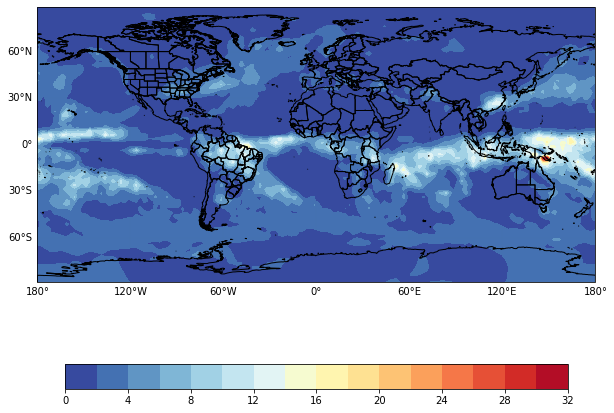

In [11]:
plot_map(new_dset['precip'].sel(time='2020-03-01'))

### Corrigir longitudes e latitudes

In [12]:
# Voltamos para o dset original!

In [13]:
dset

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 511)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-07-01
Data variables:
    precip   (time, lat, lon) float32 0.21 0.21 0.21 0.2 0.2 ... 0.0 0.0 0.0 0.0
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2108
    history:        update08/2021 V2108
    data_modified:  2021-08-06

In [14]:
# inverter latitudes: 90:-90 para -90:90
dset = dset.reindex(lat=dset['lat'][::-1])

In [15]:
dset

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 511)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-07-01
Data variables:
    precip   (time, lat, lon) float32 0.08 0.07 0.07 0.07 ... 1.07 1.05 1.03
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2108
    history:        update08/2021 V2108
    data_modified:  2021-08-06

In [16]:
dset.lat

<xarray.DataArray 'lat' (lat: 72)>
array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25, -68.75,
       -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25, -48.75, -46.25,
       -43.75, -41.25, -38.75, -36.25, -33.75, -31.25, -28.75, -26.25, -23.75,
       -21.25, -18.75, -16.25, -13.75, -11.25,  -8.75,  -6.25,  -3.75,  -1.25,
         1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Attributes:
    units:          degrees_north
    actual_range:   [ 88.75 -88.75]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [17]:
dset['lon_aux'] = xr.where(
    dset['lon'] > 180,
    dset['lon'] - 360,
    dset['lon']
)

dset = (
    dset
        .swap_dims({'lon': 'lon_aux'})
        .sel(**{'lon_aux': sorted(dset.lon_aux)})
        .drop('lon')
)

dset = dset.rename({'lon_aux': 'lon'})

In [18]:
dset.lon

<xarray.DataArray 'lon' (lon: 144)>
array([-178.75, -176.25, -173.75, -171.25, -168.75, -166.25, -163.75, -161.25,
       -158.75, -156.25, -153.75, -151.25, -148.75, -146.25, -143.75, -141.25,
       -138.75, -136.25, -133.75, -131.25, -128.75, -126.25, -123.75, -121.25,
       -118.75, -116.25, -113.75, -111.25, -108.75, -106.25, -103.75, -101.25,
        -98.75,  -96.25,  -93.75,  -91.25,  -88.75,  -86.25,  -83.75,  -81.25,
        -78.75,  -76.25,  -73.75,  -71.25,  -68.75,  -66.25,  -63.75,  -61.25,
        -58.75,  -56.25,  -53.75,  -51.25,  -48.75,  -46.25,  -43.75,  -41.25,
        -38.75,  -36.25,  -33.75,  -31.25,  -28.75,  -26.25,  -23.75,  -21.25,
        -18.75,  -16.25,  -13.75,  -11.25,   -8.75,   -6.25,   -3.75,   -1.25,
          1.25,    3.75,    6.25,    8.75,   11.25,   13.75,   16.25,   18.75,
         21.25,   23.75,   26.25,   28.75,   31.25,   33.75,   36.25,   38.75,
         41.25,   43.75,   46.25,   48.75,   51.25,   53.75,   56.25,   58.75,
         61.25,   63.75,   66.25,   68.75,   71.25,   73.75,   76.25,   78.75,
         81.25,   83.75,   86.25,   88.75,   91.25,   93.75,   96.25,   98.75,
        101.25,  103.75,  106.25,  108.75,  111.25,  113.75,  116.25,  118.75,
        121.25,  123.75,  126.25,  128.75,  131.25,  133.75,  136.25,  138.75,
        141.25,  143.75,  146.25,  148.75,  151.25,  153.75,  156.25,  158.75,
        161.25,  163.75,  166.25,  168.75,  171.25,  173.75,  176.25,  178.75],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8

In [19]:
dset

<xarray.Dataset>
Dimensions:  (lat: 72, time: 511, lon: 144)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-07-01
  * lon      (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
Data variables:
    precip   (time, lat, lon) float32 0.12 0.13 0.13 0.13 ... 1.37 1.36 1.35
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2108
    history:        update08/2021 V2108
    data_modified:  2021-08-06

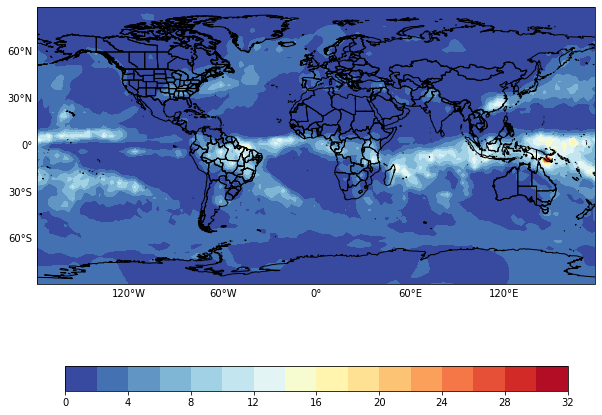

In [20]:
plot_map(dset['precip'].sel(time='2020-03-01'))